In [20]:
import pandas as pd 
import numpy as np

In [3]:
text_data=['A metaverse is a network of 3D virtual worlds focused on social connection.',
           'In futurism and science fiction, the term is often described as a hypothetical iteration of the Internet as a single', 
           'universal virtual world that is facilitated by the use of virtual and augmented reality headsets.',
           'The term "metaverse" has its origins  the 1992 science fiction novel Snow Crash as a portmanteau of "meta" and "universe."',
           'Various metaverses have been developed for popular use such as virtual world platforms like Second Life.',
           'Some metaverse iterations involve integration between virtual and physical spaces and virtual economies',
           'often including a significant interest in advancing virtual reality technology.', 
           'The term has seen considerable use as a buzzword for public relations purposes to exaggerate development progress for various related technologies and projects.[10] Information privacy and user addiction are concerns within metaverses',
           'stemming from challenges facing the social media and video game industries as a whole.']

### 1) Vectorize the given text data using countvectorizer() object. What is the shape of text_data after vectorization?

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
transformed_data = vectorizer.fit_transform(text_data)

transformed_data.shape

(9, 99)

### 2) What is the token associated with word "metaverse"?

In [14]:
vectorizer.vocabulary_["metaverse"]

51

### 3) What is the shape of text_data after vectorization after the term that appeared in less than 2 documents are ignored?

In [15]:
vectorizer2 = CountVectorizer(min_df=2)

transformed_data2 = vectorizer2.fit_transform(text_data)

transformed_data2.shape

(9, 20)

In [17]:
Docs = ['This is the first question.', 'This document is the second document.', 'And this is the third one' ]

### 4)  Write a code to convert the above text into an array after tokenizing it using countvectorizer with 10 features. What will be the output?

In [18]:
vectorizer3 = CountVectorizer(max_df = 10)

vectorizer3.fit_transform(Docs).toarray()

array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1]])

### 5) Define a function called k_closest in python with the following signature:

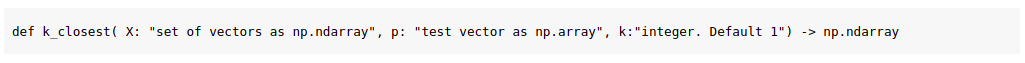

 Which returns closest vectors in X which are closest to the vector p. Use the appropriate sklearn methods.

Consider, X = np.asarray([[72, 69 ,82], [ 9 ,79, 99], [20 ,47, 88], [80 ,64, 49]]) p= np.asarray([[0,0,0]]) and k=1 For these values, what is the output of the function?

In [21]:
from sklearn.neighbors import KNeighborsClassifier

def k_closest(X: "set of vectors as np.ndarray" , p:"test vector as np.array" , k:"integer. Default 1") -> np.ndarray:
    knn = KNeighborsClassifier()
    knn.fit(X)
    distances , indices = knn.kneighbors(p, n_neighbors=k)
    return indices

In [22]:
k_closest(X = np.asarray([[72, 69 ,82], [ 9 ,79, 99], [20 ,47, 88], [80 ,64, 49]]) ,  p= np.asarray([[0,0,0]]) , k=1)

TypeError: KNeighborsClassifier.fit() missing 1 required positional argument: 'y'

### 6) Define a function called distance in python with the following signature: 

`def distance( x0 : "A vector as np.array", X: "A list of vectors as np.ndarray", p : "p value for Minkowsky distance. Default 2, for Eucledian"):`

which returns a list of calculated Minkowsky distances between the point x0 and all points in X. Recall that the p-Minkowsky distance between
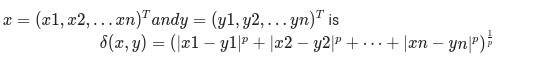

Do not use any predefined function to calculate the same. 
      Consider, X0 = np.array([1,0,0,0]), X= np.asarray([[1, 0, 0,0], [0, 1, 1,1],[1,2,0,0]]), p= 2 then, what is the output of the function distance(X0,X,p) ?

In [39]:
from sklearn.metrics.pairwise import pairwise_distances

def distance(X0 : "A vector as np.array", 
             X: "A list of vectors as np.ndarray", 
             p : "p value for Minkowsky distance. Default 2, for Eucledian" = 2):
    distances = []
    for point in X:
        distances += [
            sum( (abs(point - X0))**p  )
        ]
    return distances

In [40]:
distance(X0 = np.array([1,0,0,0]), X= np.asarray([[1, 0, 0,0], [0, 1, 1,1],[1,2,0,0]]), p= 2)

[0, 4, 4]

**Load digit dataset on Colab (datasets.load_digits()) and use softmax regression to build the model Using following steps.**  
 **Step 1: Load the dataset and split it using train_test_split by keeping: test_size= 0.2 random_state=10**  
 **Step 2: Use standard scaler as a scaling function to scale the training as well as test data.**  
 **Step 3: Use Logisticregression() as an estimator and set parameter (multi_class='multinomial', solver='sag') to predict the output.**  

In [41]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True , as_frame=True)

In [42]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=10)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial' , solver='sag')

### 7) What is the shape of features data you got in digits dataset ?

In [45]:
X.shape

(1797, 64)

### 8) How many labels are there in the dataset?

In [46]:
y.nunique()

10

### 9) How many times label '7' is there in the dataset?

In [50]:
y.value_counts()[7]

179

### 10) What is the accuracy of the trained model on test data?

In [51]:
clf.fit(X_train , y_train)

clf.score(X_test , y_test)

/home/tejasvmaheshwari/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9666666666666667

### 11) Write the f1_score value you got .(Keep parameter average='weighted')

In [53]:
from sklearn.metrics import f1_score 

f1_score(y_test , clf.predict(X_test) , average='weighted')

0.966907732026411